# Demo

This demo demonstrate how to train various (semi-supervised) Neural NMF models and how to analyze and visualize the result. Note that error and accuracy values vary run to run due to random initializations within the methods. 

# Data Preprocessing

In [1]:
# loading packages and functions
import torch
import numpy as np
import scipy.io
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

from NeuralNMF import Neural_NMF, Energy_Loss_Func, L21_Norm, Recon_Loss_Func
from NeuralNMF import LsqNonneg
from NeuralNMF import train_unsupervised, train_supervised

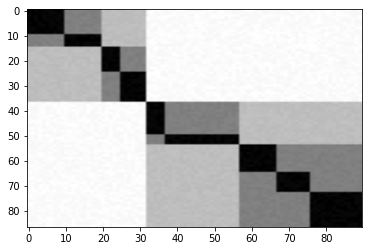

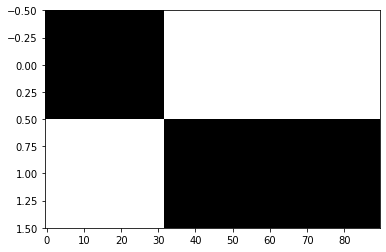

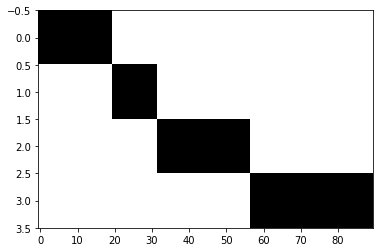

In [2]:
# data loading 
data = scipy.io.loadmat('synthetic_noise.mat')
X = data['X']
X = Variable(torch.from_numpy(X).double())
Y2 = data['Y2']
Y2 = Variable(torch.from_numpy(Y2).double())
Y4 = data['Y4']
Y4 = Variable(torch.from_numpy(Y4).double())
Y9 = data['Y9']
Y9 = Variable(torch.from_numpy(Y9).double())
L0 = data['L0']
L0 = Variable(torch.from_numpy(L0).double())
L10 = data['L10']
L10 = Variable(torch.from_numpy(L10).double())
L20 = data['L20']
L20 = Variable(torch.from_numpy(L20).double())
L30 = data['L30']
L30 = Variable(torch.from_numpy(L30).double())
L40 = data['L40']
L40 = Variable(torch.from_numpy(L40).double())
L50 = data['L50']
L50 = Variable(torch.from_numpy(L50).double())
L60 = data['L60']
L60 = Variable(torch.from_numpy(L60).double())
L70 = data['L70']
L70 = Variable(torch.from_numpy(L70).double())
L80 = data['L80']
L80 = Variable(torch.from_numpy(L80).double())
L90 = data['L90']
L90 = Variable(torch.from_numpy(L90).double())
labels9 = data['labels9']
labels9 = Variable(torch.from_numpy(labels9).long())
labels9 = torch.reshape(labels9,[90])
labels4 = data['labels4']
labels4 = Variable(torch.from_numpy(labels4).long())
labels4 = torch.reshape(labels4,[90])
labels2 = data['labels2']
labels2 = Variable(torch.from_numpy(labels2).long())
labels2 = torch.reshape(labels2,[90])
plt.imshow(X,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y2,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y4,aspect='auto',cmap='binary')
plt.show()

In [3]:
# set the network parameters
m = X.shape[0]
k1 = 9
k2 = 4
k3 = 2

In [4]:
# create tables for reconstruction error and accuracy
recon_table = torch.zeros(9,2)
accuracy_table = torch.zeros(9,2)

# Neural NMF Experiments

## Unsupervised One-Layer

In [5]:
net = Neural_NMF([m, k1])
loss_func = Energy_Loss_Func()
history_unsupervised = train_unsupervised(net, X, loss_func, epoch = 100000, lr = 1e-6,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 100000/100000 [19:20<00:00, 86.21it/s]


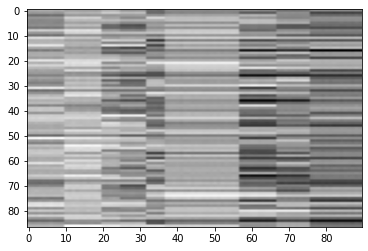

In [6]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

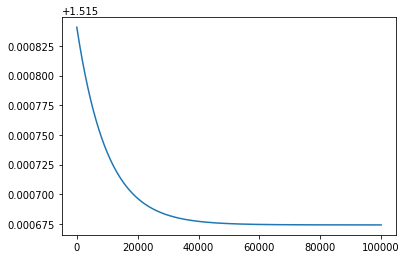

In [7]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

In [8]:
# Reconstruction error
recon_table[0,1] = np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')

0.7474913931524172

In [9]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y9,0,1),torch.transpose(S1[-1],0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(9)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,S1[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[0,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

<ipython-input-9-ee06ddde47ad>:3: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  ../aten/src/ATen/LegacyTHFunctionsCPU.cpp:389.)
  B = torch.lstsq(torch.transpose(Y9,0,1),torch.transpose(S1[-1],0,1))[0]


1.0

## Unsupervised Two-Layer

In [10]:
net = Neural_NMF([m, k1,k2])
X_input = X
history_unsupervised = train_unsupervised(net, X_input, epoch = 100000, lr = 1e-6,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 100000/100000 [52:58<00:00, 31.46it/s] 


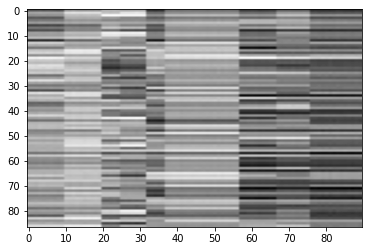

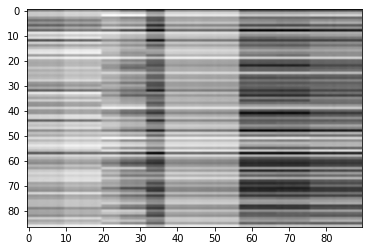

In [11]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')

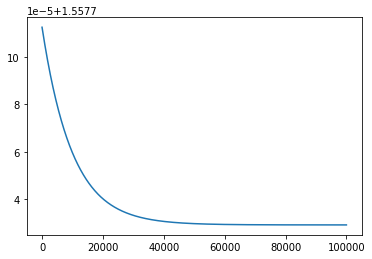

In [12]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

In [13]:
# Reconstruction error
recon_table[1,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')

0.7577906796884116

In [14]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y4,0,1),torch.transpose(S2[-1],0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(4)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,S2[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[1,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Unsupervised Three-Layer

In [15]:
net = Neural_NMF([m, k1, k2, k3])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 100000, lr = 1e-6,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

100%|██████████| 100000/100000 [1:27:31<00:00, 19.04it/s]   


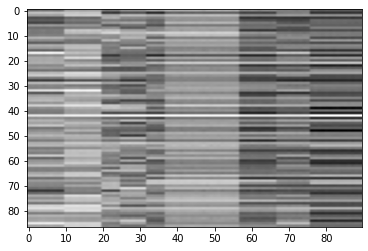

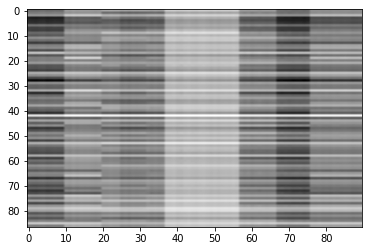

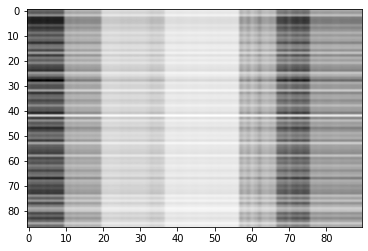

In [16]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
A3 = history_unsupervised.get('A3')
S3 = history_unsupervised.get('S3')
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

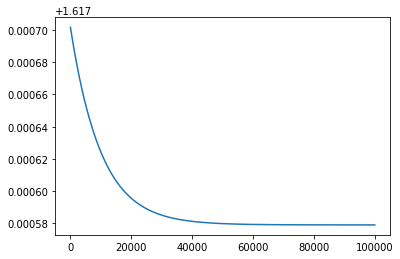

In [17]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

In [18]:
# Reconstruction error
recon_table[2,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')

0.8257437337169108

In [19]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y2,0,1),torch.transpose(S3[-1],0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(2)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,S3[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[2,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.6444444444444445

## Supervised One-Layer

In [20]:
# supervised case
c = 9
net = Neural_NMF([m, k1], c)
loss_func = Energy_Loss_Func(lambd = 1e-10,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels9, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [19:50<00:00, 83.97it/s]


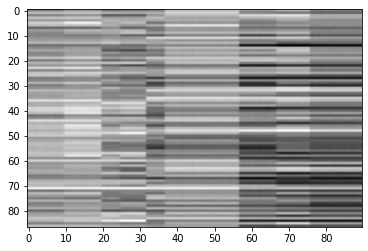

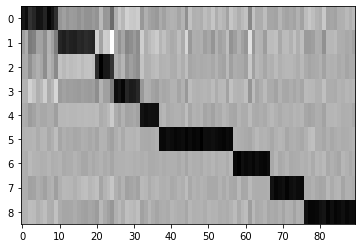

In [21]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = Y9 @ np.linalg.pinv(S1[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S1[-1],aspect='auto',cmap='binary')
plt.show()

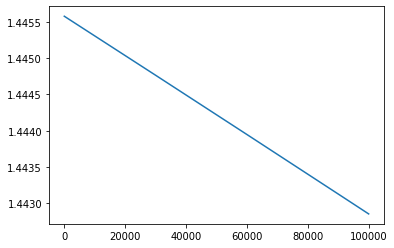

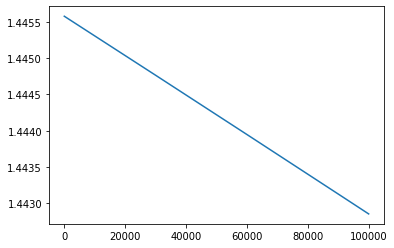

In [22]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [23]:
# Reconstruction error
recon_table[6,1] = np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')

0.7293145451811992

In [24]:
correct_num = 0

B = Y9 @ torch.pinverse(S1[-1])

Y_approx = torch.matmul(B,S1[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[6,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Supervised Two-Layer

In [25]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1e-5,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels4, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [42:45<00:00, 38.98it/s] 


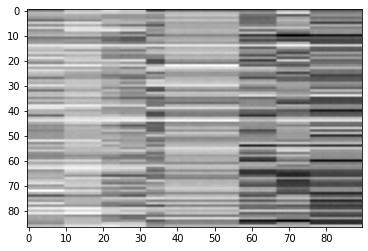

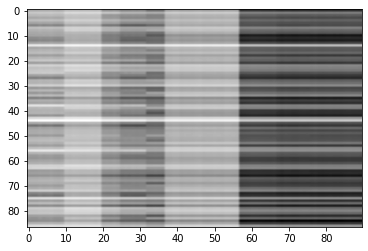

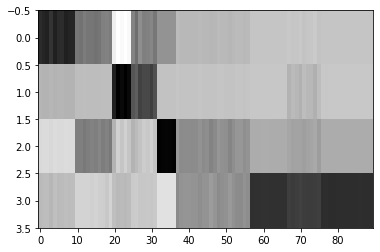

In [26]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = Y4 @ torch.pinverse(S2[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S2[-1],aspect='auto',cmap='binary')
plt.show()

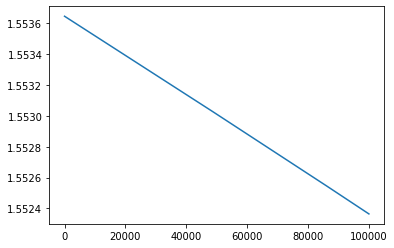

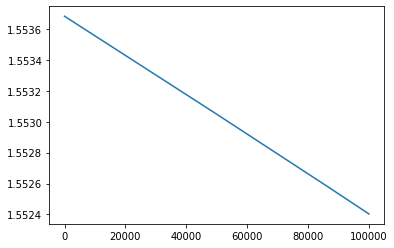

In [27]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [28]:
# Reconstruction error
recon_table[7,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')

0.7618543804032059

In [29]:
correct_num = 0

B = Y4 @ torch.pinverse(S2[-1])

Y_approx = torch.matmul(B,S2[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[7,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8777777777777778

## Supervised Three-Layer

In [30]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1e-5,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels2, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [1:07:27<00:00, 24.71it/s]


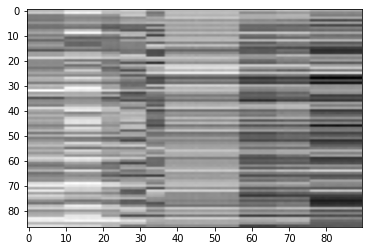

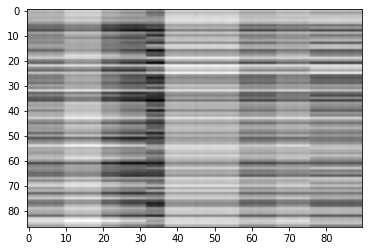

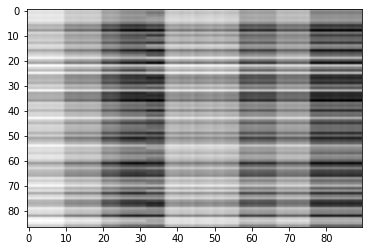

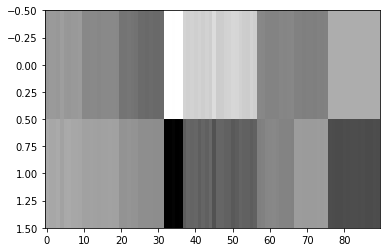

In [31]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = Y2 @ torch.pinverse(S3[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S3[-1],aspect='auto',cmap='binary')
plt.show()

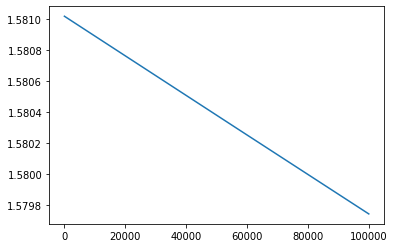

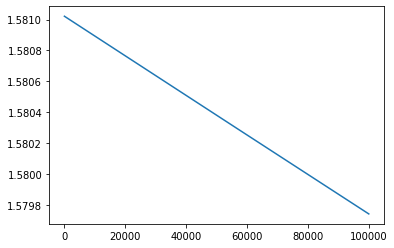

In [32]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [33]:
# Reconstruction error
recon_table[8,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')

0.7747978458073782

In [34]:
correct_num = 0

B = Y2 @ torch.pinverse(S3[-1])

Y_approx = torch.matmul(B,S3[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[8,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8555555555555555

## Supervised One-Layer (Cross-Entropy)

In [35]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
loss_func = Energy_Loss_Func(lambd = 1e-10)
history_supervised = train_supervised(net, X, labels9, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [20:50<00:00, 79.97it/s]


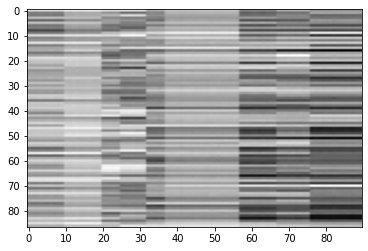

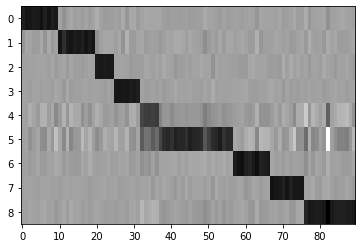

In [36]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = Y9 @ np.linalg.pinv(S1[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S1[-1],aspect='auto',cmap='binary')
plt.show()

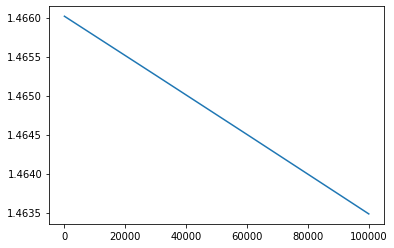

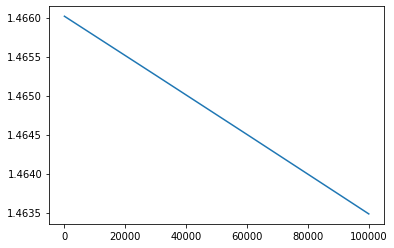

In [37]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [38]:
# Reconstruction error

np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')

0.734509043170294

In [39]:
correct_num = 0

B = Y9 @ torch.pinverse(S1[-1])

Y_approx = torch.matmul(B,S1[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
correct_num/X.shape[1]

1.0

## Supervised Two-Layer (Cross-Entropy)

In [40]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1e-5)
history_supervised = train_supervised(net, X, labels4, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [42:06<00:00, 39.58it/s] 


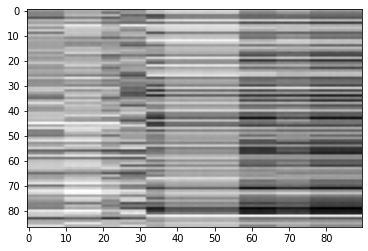

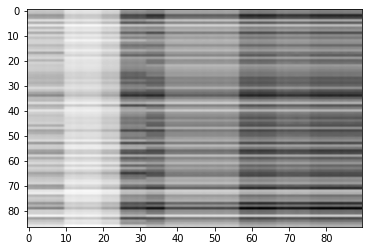

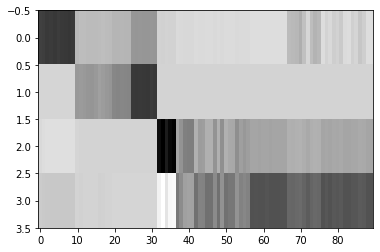

In [41]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = Y4 @ torch.pinverse(S2[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S2[-1],aspect='auto',cmap='binary')
plt.show()

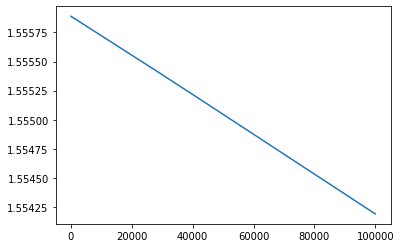

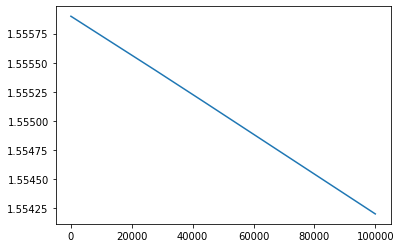

In [42]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [43]:
# Reconstruction error

np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')

0.7690105727514984

In [44]:
correct_num = 0

B = Y4 @ torch.pinverse(S2[-1])

Y_approx = torch.matmul(B,S2[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
correct_num/X.shape[1]

0.7222222222222222

## Supervised Three-Layer (Cross-Entropy)

In [45]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1e-5)
history_supervised = train_supervised(net, X, labels2, L = torch.ones(c,X.shape[1]).double(), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [1:21:37<00:00, 20.42it/s] 


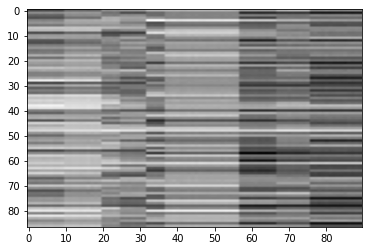

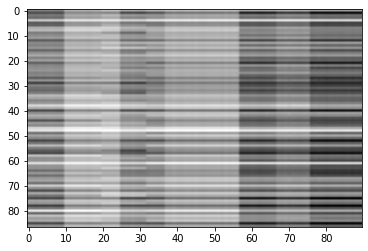

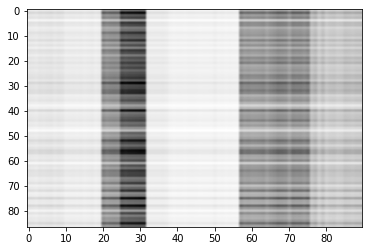

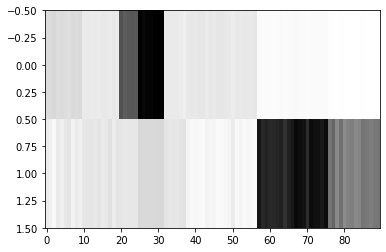

In [46]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = Y2 @ torch.pinverse(S3[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S3[-1],aspect='auto',cmap='binary')
plt.show()

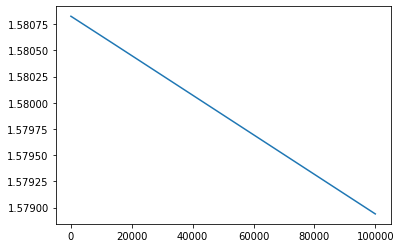

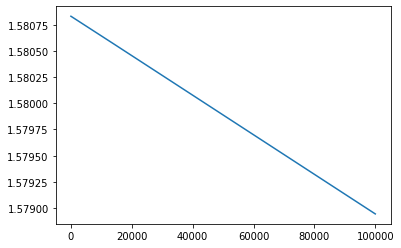

In [47]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [48]:
# Reconstruction error

np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')

0.8496701409665619

In [49]:
correct_num = 0

B = Y2 @ torch.pinverse(S3[-1])

Y_approx = torch.matmul(B,S3[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
correct_num/X.shape[1]

0.7111111111111111

## Semi-supervised One-Layer

In [50]:
# supervised case
c = 9
net = Neural_NMF([m, k1], c)
loss_func = Energy_Loss_Func(lambd = 1e-10,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels9, L = L40.repeat(5,1)[range(9),:], loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [21:19<00:00, 78.15it/s]


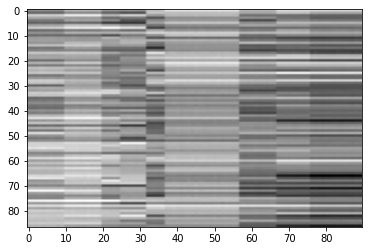

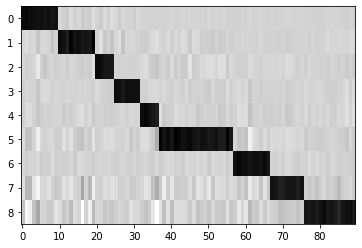

In [51]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = Y9 @ np.linalg.pinv(S1[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S1[-1],aspect='auto',cmap='binary')
plt.show()

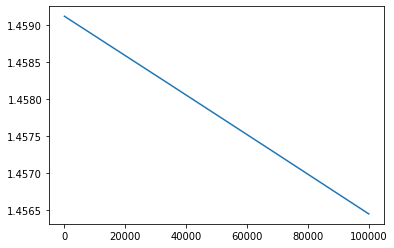

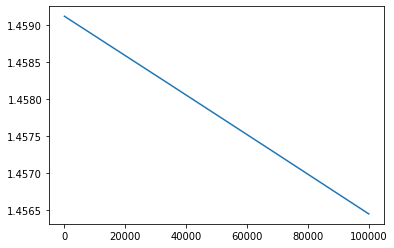

In [52]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [53]:
# Reconstruction error
recon_table[3,1] = np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ S1[-1],'fro')/np.linalg.norm(X,'fro')

0.7327406952998133

In [54]:
correct_num = 0

B = Y9 @ torch.pinverse(S1[-1])

Y_approx = torch.matmul(B,S1[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[3,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Semi-supervised Two-Layer

In [55]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1e-5,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels4, L = L40.repeat(2,1), loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [46:26<00:00, 35.88it/s] 


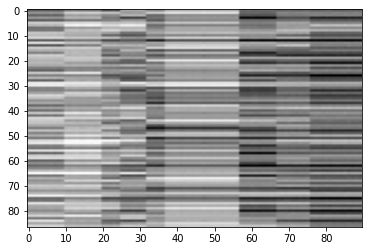

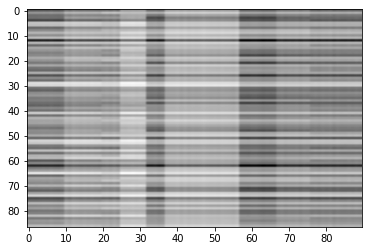

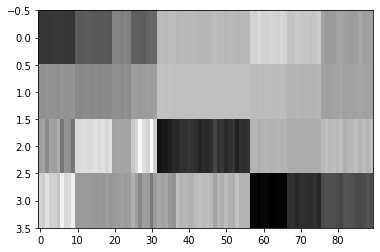

In [56]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = Y4 @ torch.pinverse(S2[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S2[-1],aspect='auto',cmap='binary')
plt.show()

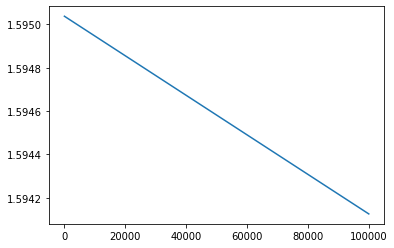

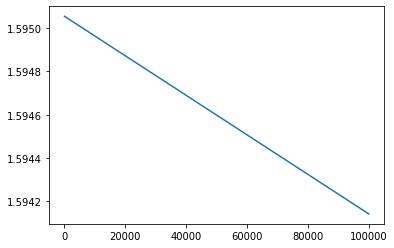

In [57]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [58]:
# Reconstruction error
recon_table[4,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ S2[-1],'fro')/np.linalg.norm(X,'fro')

0.772861484992331

In [59]:
correct_num = 0

B = Y4 @ torch.pinverse(S2[-1])

Y_approx = torch.matmul(B,S2[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[4,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8666666666666667

## Semi-supervised Three-Layer

In [60]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1e-5,classification_type = 'L2')
history_supervised = train_supervised(net, X, labels2, L = L40, loss_func = loss_func, epoch = 100000, decay_epoch=100, lr = 1e-6, weight_decay = 1,verbose_epoch=1000,optimizer = "gd", full_history = True)

100%|██████████| 100000/100000 [1:11:35<00:00, 23.28it/s]


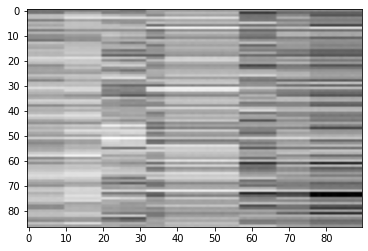

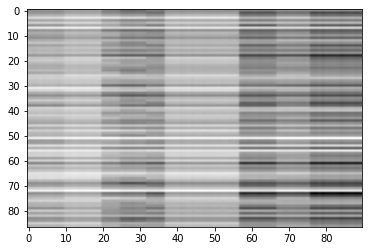

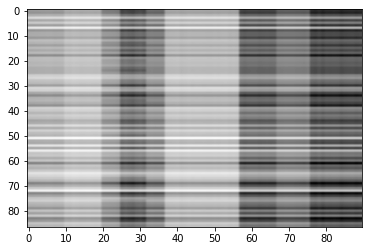

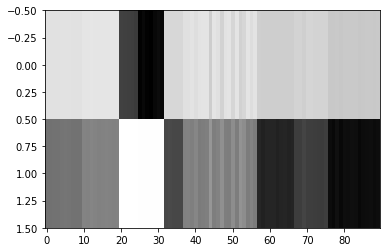

In [61]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = Y2 @ torch.pinverse(S3[-1])
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B @ S3[-1],aspect='auto',cmap='binary')
plt.show()

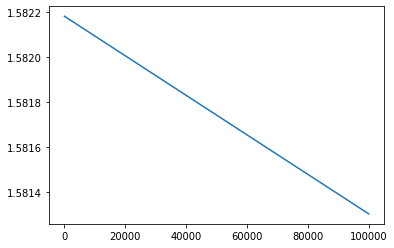

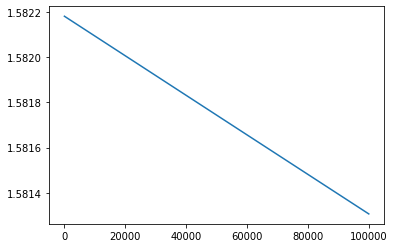

In [62]:
# plot the loss curve
history_supervised.plot_scalar('loss_nmf')
history_supervised.plot_scalar('loss_classification')

In [63]:
# Reconstruction error
recon_table[5,1] = np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],'fro')/np.linalg.norm(X,'fro')

0.7680371459392923

In [64]:
correct_num = 0

B = Y2 @ torch.pinverse(S3[-1])

Y_approx = torch.matmul(B,S3[-1])
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[5,1] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.7777777777777778

# Hierarchical NMF Experiments

In [65]:
import sys
import ssnmf

from ssnmf import SSNMF

## Unsupervised One-Layer

In [66]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

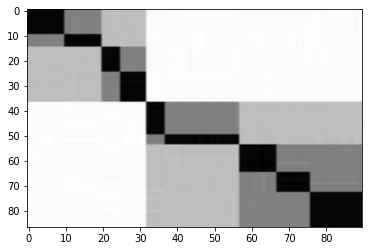

In [67]:
plt.imshow(model_1.A @ model_1.S,aspect='auto',cmap='binary')
plt.show()

In [68]:
# Reconstruction error
recon_table[0,0] = np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')

0.025202916124107404

In [69]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y9,0,1),torch.transpose(torch.tensor(model_1.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(9)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_1.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[0,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Unsupervised Two-Layer

In [70]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,modelNum=1)
model_2.mult(numiters = N)

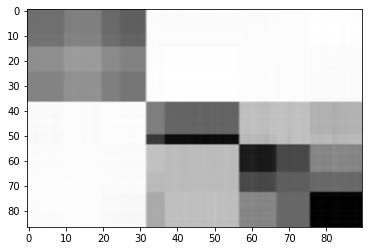

In [71]:
plt.imshow(model_1.A @ model_2.A @ model_2.S,aspect='auto',cmap='binary')
plt.show()

In [72]:
# Reconstruction error
recon_table[1,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')

0.33259909290398026

In [73]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y4,0,1),torch.transpose(torch.tensor(model_2.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(4)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_2.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[1,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8666666666666667

## Unsupervised Three-Layer

In [74]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,modelNum=1)
model_2.mult(numiters = N)

model_3 = SSNMF(model_2.S,2,modelNum=1)
model_3.mult(numiters = N)

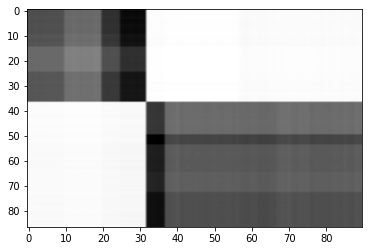

In [75]:
plt.imshow(model_1.A @ model_2.A @ model_3.A @ model_3.S,aspect='auto',cmap='binary')
plt.show()

In [76]:
# Reconstruction error
recon_table[2,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')

0.4955975348379503

In [77]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y2,0,1),torch.transpose(torch.tensor(model_3.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(2)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_3.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[2,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Supervised One-Layer

In [78]:
model_1 = SSNMF(X.numpy(),9,Y = Y9.numpy(), modelNum=3,lam=1e-5)
N = 800
model_1.mult(numiters = N)

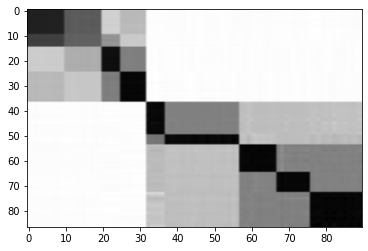

In [79]:
plt.imshow(model_1.A @ model_1.S,aspect='auto',cmap='binary')
plt.show()

In [80]:
# Reconstruction error
recon_table[6,0] = np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')

0.11421929263982987

In [81]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y9,0,1),torch.transpose(torch.tensor(model_1.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(9)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_1.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[6,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8888888888888888

## Supervised Two-Layer

In [82]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,Y=Y4.numpy(),modelNum=3,lam=1e-5)
model_2.mult(numiters = N)

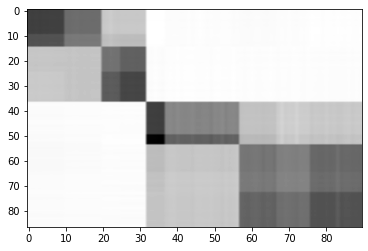

In [83]:
plt.imshow(model_1.A @ model_2.A @ model_2.S,aspect='auto',cmap='binary')
plt.show()

In [84]:
# Reconstruction error
recon_table[7,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')

0.28518525199892336

In [85]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y4,0,1),torch.transpose(torch.tensor(model_2.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(4)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_2.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[7,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Supervised Three-Layer

In [86]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,modelNum=1)
model_2.mult(numiters = N)

model_3 = SSNMF(model_2.S,2,Y = Y2.numpy(), modelNum=3,lam=1e-5)
model_3.mult(numiters = N)

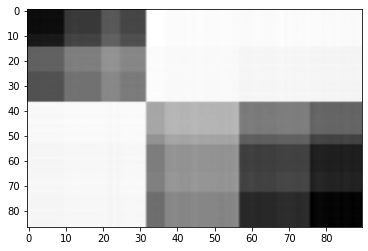

In [87]:
plt.imshow(model_1.A @ model_2.A @ model_3.A @ model_3.S,aspect='auto',cmap='binary')
plt.show()

In [88]:
# Reconstruction error
recon_table[8,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')

0.47606246411676767

In [89]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y2,0,1),torch.transpose(torch.tensor(model_3.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(2)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_3.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[8,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Semi-supervised One-Layer

In [90]:
model_1 = SSNMF(X.numpy(),9,Y = Y9.numpy(), L = L40.repeat(5,1)[range(9),:].numpy(),modelNum=3,lam=1e-5)
N = 800
model_1.mult(numiters = N)

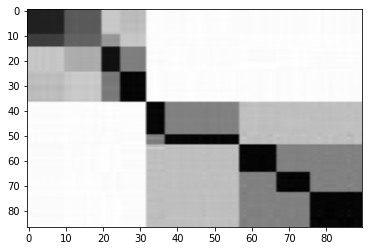

In [91]:
plt.imshow(model_1.A @ model_1.S,aspect='auto',cmap='binary')
plt.show()

In [92]:
# Reconstruction error
recon_table[3,0] = np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_1.S,'fro')/np.linalg.norm(X,'fro')

0.11421203295375179

In [93]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y9,0,1),torch.transpose(torch.tensor(model_1.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(9)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_1.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y9[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[3,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

0.8888888888888888

## Semi-supervised Two-Layer

In [94]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,Y=Y4.numpy(),L = L40.repeat(2,1).numpy(),modelNum=3,lam=1e-5)
model_2.mult(numiters = N)

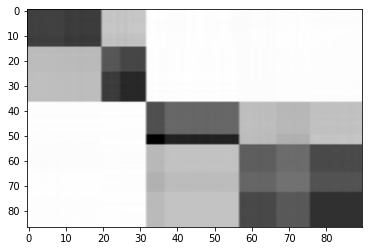

In [95]:
plt.imshow(model_1.A @ model_2.A @ model_2.S,aspect='auto',cmap='binary')
plt.show()

In [96]:
# Reconstruction error
recon_table[4,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_2.S,'fro')/np.linalg.norm(X,'fro')

0.28670026179265246

In [97]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y4,0,1),torch.transpose(torch.tensor(model_2.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(4)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_2.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y4[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[4,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

## Semi-supervised Three-Layer

In [98]:
model_1 = SSNMF(X.numpy(),9,modelNum=1)
N = 800
model_1.mult(numiters = N)

model_2 = SSNMF(model_1.S,4,modelNum=1)
model_2.mult(numiters = N)

model_3 = SSNMF(model_2.S,2,Y = Y2.numpy(), L = L40.numpy(),modelNum=3,lam=1e-5)
model_3.mult(numiters = N)

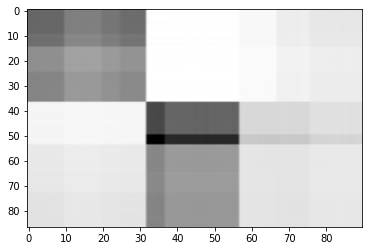

In [99]:
plt.imshow(model_1.A @ model_2.A @ model_3.A @ model_3.S,aspect='auto',cmap='binary')
plt.show()

In [100]:
# Reconstruction error
recon_table[5,0] = np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')
np.linalg.norm(X - model_1.A @ model_2.A @ model_3.A @ model_3.S,'fro')/np.linalg.norm(X,'fro')

0.6677906891808894

In [101]:
correct_num = 0

B = torch.lstsq(torch.transpose(Y2,0,1),torch.transpose(torch.tensor(model_3.S),0,1))[0]
B = torch.index_select(B,0,torch.tensor(range(2)))
B = torch.transpose(B,0,1)

Y_approx = torch.matmul(B,torch.tensor(model_3.S))
for i in range(X.shape[1]):    
    if torch.argmax(Y_approx[:,i]) == torch.argmax(Y2[:,i]):
        correct_num = correct_num + 1

# classification accuracy
accuracy_table[5,0] = correct_num/X.shape[1]
correct_num/X.shape[1]

1.0

# Collected Results

In [102]:
# reconstruction errors
recon_table

tensor([[0.0252, 0.7475],
        [0.3326, 0.7578],
        [0.4956, 0.8257],
        [0.1142, 0.7327],
        [0.2867, 0.7729],
        [0.6678, 0.7680],
        [0.1142, 0.7293],
        [0.2852, 0.7619],
        [0.4761, 0.7748]])

In [103]:
# classification accuracies
accuracy_table

tensor([[1.0000, 1.0000],
        [0.8667, 1.0000],
        [1.0000, 0.6444],
        [0.8889, 1.0000],
        [1.0000, 0.8667],
        [1.0000, 0.7778],
        [0.8889, 1.0000],
        [1.0000, 0.8778],
        [1.0000, 0.8556]])